HR-Diagram (Data from Hipparcos Catalog and Gliese Catalog of Nearby Stars)

In [1]:
%matplotlib inline
from pylab import *
import pandas as pd
from matplotlib.ticker import *
import numpy as np
import matplotlib.pyplot as plt

In [63]:
def Magnitude(v,parallax):
    '''Absolute Magnitude from apparent magnitude and Parallax'''
    # parallax here is in MilliArcSeconds!!
    M = v + 5*(log10(parallax/100))
    return(M)

def Luminosity(M):
    Ls = 10**((4.77 - M)/2.5)
    Ls / (3.8*10**26)
    return(Ls)

def Temperature(L):
    Ts = (L)**(1.0/6.0)
    Ts = Ts * 5780.0
    return(Ts)

def Mass(L):
    Mass = ((L/((3.846*10**26)*1.4))**(1/3.5) *1.98*10**30)
    return Mass

def age(M):
    age = (M)**(-2.5)
    return age

In [3]:
#'Hipparcos Data'

%cd C:\Users\elvin\Desktop\Stars
H_data = pd.read_table('H1.csv', delimiter = ',',\
names = ['parallax', 'stype','vmag','B-V'], skiprows = 1)
#H_data.head()

C:\Users\elvin\Desktop\Stars


In [4]:
#'Gliese Data'
%cd C:\Users\elvin\Desktop\Stars
G_data = pd.read_table('Glieseall.csv', delimiter = ',',skiprows = 1,\
names = ['parallax','stype','vmag','B-V'])

G_data.head()

C:\Users\elvin\Desktop\Stars


,parallax,stype,vmag,B-V
0,-26.72,G2 V,0.65,
1,14.58,DA6,0.22,
2,10.22,,0.34,56.6
3,11.03,k-m,1.36,49
4,7.68,K0 V,0.78,49


In [5]:
#'Combining  both charts into one data table'
H = pd.DataFrame(H_data)
G = pd.DataFrame(G_data)
data = H.append(G)
data.head()

,parallax,stype,vmag,B-V
0,4.17,A0IV,7.84,0.097\t
1,2.08,M4III,6.82,1.698\t
2,2.39,M1III,7.2,1.712\t
3,11.95,F2/F3V,7.83,0.412\t
4,4.42,A3m...,8.86,0.260\t


In [6]:
#'Parallax and B-V both have NAN. Have to get rid of those'
data.describe()

,parallax
count,103581.000000
mean,7.409542
std,11.266548
min,-54.950000
25%,2.620000
50%,4.880000
75%,8.950000
max,772.330000


In [7]:
data = data.applymap(lambda x: np.nan if isinstance(x,str) and x.isspace() else x)

In [8]:
#'Changed the empty spaces to NAN to make it easier to get rid of them'
data.describe()

,parallax
count,103581.000000
mean,7.409542
std,11.266548
min,-54.950000
25%,2.620000
50%,4.880000
75%,8.950000
max,772.330000


In [9]:
#'You can see that the NAN and empty spaces have been removed'
data = data.dropna()
data.head(50)

,parallax,stype,vmag,B-V
0,4.17,A0IV,7.84,0.097\t
1,2.08,M4III,6.82,1.698\t
2,2.39,M1III,7.2,1.712\t
3,11.95,F2/F3V,7.83,0.412\t
4,4.42,A3m...,8.86,0.260\t
5,9.18,F0IV/V,7.54,0.331\t
6,7.74,G2V:,9.69,0.720\t
7,2.96,K0III+...,8.06,1.053\t
8,5.42,A7III,8.25,0.291\t
9,12.07,F0III,5.45,0.283\t


In [10]:
#'Change the data in the tables to floats'
data['parallax'] = data['parallax'].astype(np.float)
data['vmag'] = data['vmag'].astype(np.float)
data['B-V'] = data['B-V'].astype(np.float)

color = data['B-V']


In [11]:
#'Time to add the Absolute Magnitude to the table.'
data['M'] = Magnitude(data['vmag'],data['parallax'])
data['M'] = data['M'].astype(np.float)
data.head()

C:\Users\elvin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
C:\Users\elvin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


,parallax,stype,vmag,B-V,M
0,4.17,A0IV,7.84,0.097,0.940680
1,2.08,M4III,6.82,1.698,-1.589683
2,2.39,M1III,7.20,1.712,-0.908010
3,11.95,F2/F3V,7.83,0.412,3.216840
4,4.42,A3m...,8.86,0.260,2.087111


In [12]:
#'Checking the spectral types'
f = lambda s: s[0]
classes = data['stype'].map(f)
classes.value_counts()

K    27601
F    22269
G    19952
A    14813
B     8565
M     4509
d      403
O      206
m      203
C      139
D      125
s       69
W       59
R       56
k       55
N       45
S       21
g        7
p        1
f        1
(        1
Name: stype, dtype: int64

In [13]:
#'We only want to keep OBAFGKM'
f = lambda s: s[0] in 'OBAFGKM'
data = data[data['stype'].map(f)]

In [14]:
#'Checking to see if it worked'
f = lambda s: s[0]
classes = data['stype'].map(f)
classes.value_counts()

K    27601
F    22269
G    19952
A    14813
B     8565
M     4509
O      206
Name: stype, dtype: int64

In [85]:
Lum = Luminosity(data['M'])
data['Luminosity'] = Lum ##adding the luminosity to the dataframe




In [86]:
f = lambda s: 'VII' in s
b = data['stype'].map(f)
print ("Class VII: white dwarfs, there are %d stars"%sum(b))

f = lambda s: ('VI' in s) and ('VII' not in s)
b =  data['stype'].map(f)
print ("Class VI: subdwarfs, there are %d stars" %sum(b))

f = lambda s: ('V' in s) and ('VI' not in s) and ('IV' not in s)
b =  data['stype'].map(f)
print ("Class V: main-sequence, there are %d stars" %sum(b))

f = lambda s: 'IV' in s
b = data['stype'].map(f)
print ("Class IV: subgiants, there are %d stars" %sum(b))

f = lambda s: 'III' in s
b =  data['stype'].map(f)
print ("Class III: giants, there are %d stars" %sum(b))

f = lambda s: ('II' in s) and ('III' not in s) and ('VII' not in s)
b = data['stype'].map(f)
print ("Class II:  bright giants, there are %d stars" %sum(b))

f = lambda s: ('I' in s) and ('II' not in s) and ('V' not in s)
b = data['stype'].map(f)
print ("Class I: supergiants, there are %d stars" %sum(b))

Class VII: white dwarfs, there are 1 stars
Class VI: subdwarfs, there are 25 stars
Class V: main-sequence, there are 24274 stars
Class IV: subgiants, there are 7656 stars
Class III: giants, there are 21382 stars
Class II:  bright giants, there are 1099 stars
Class I: supergiants, there are 696 stars


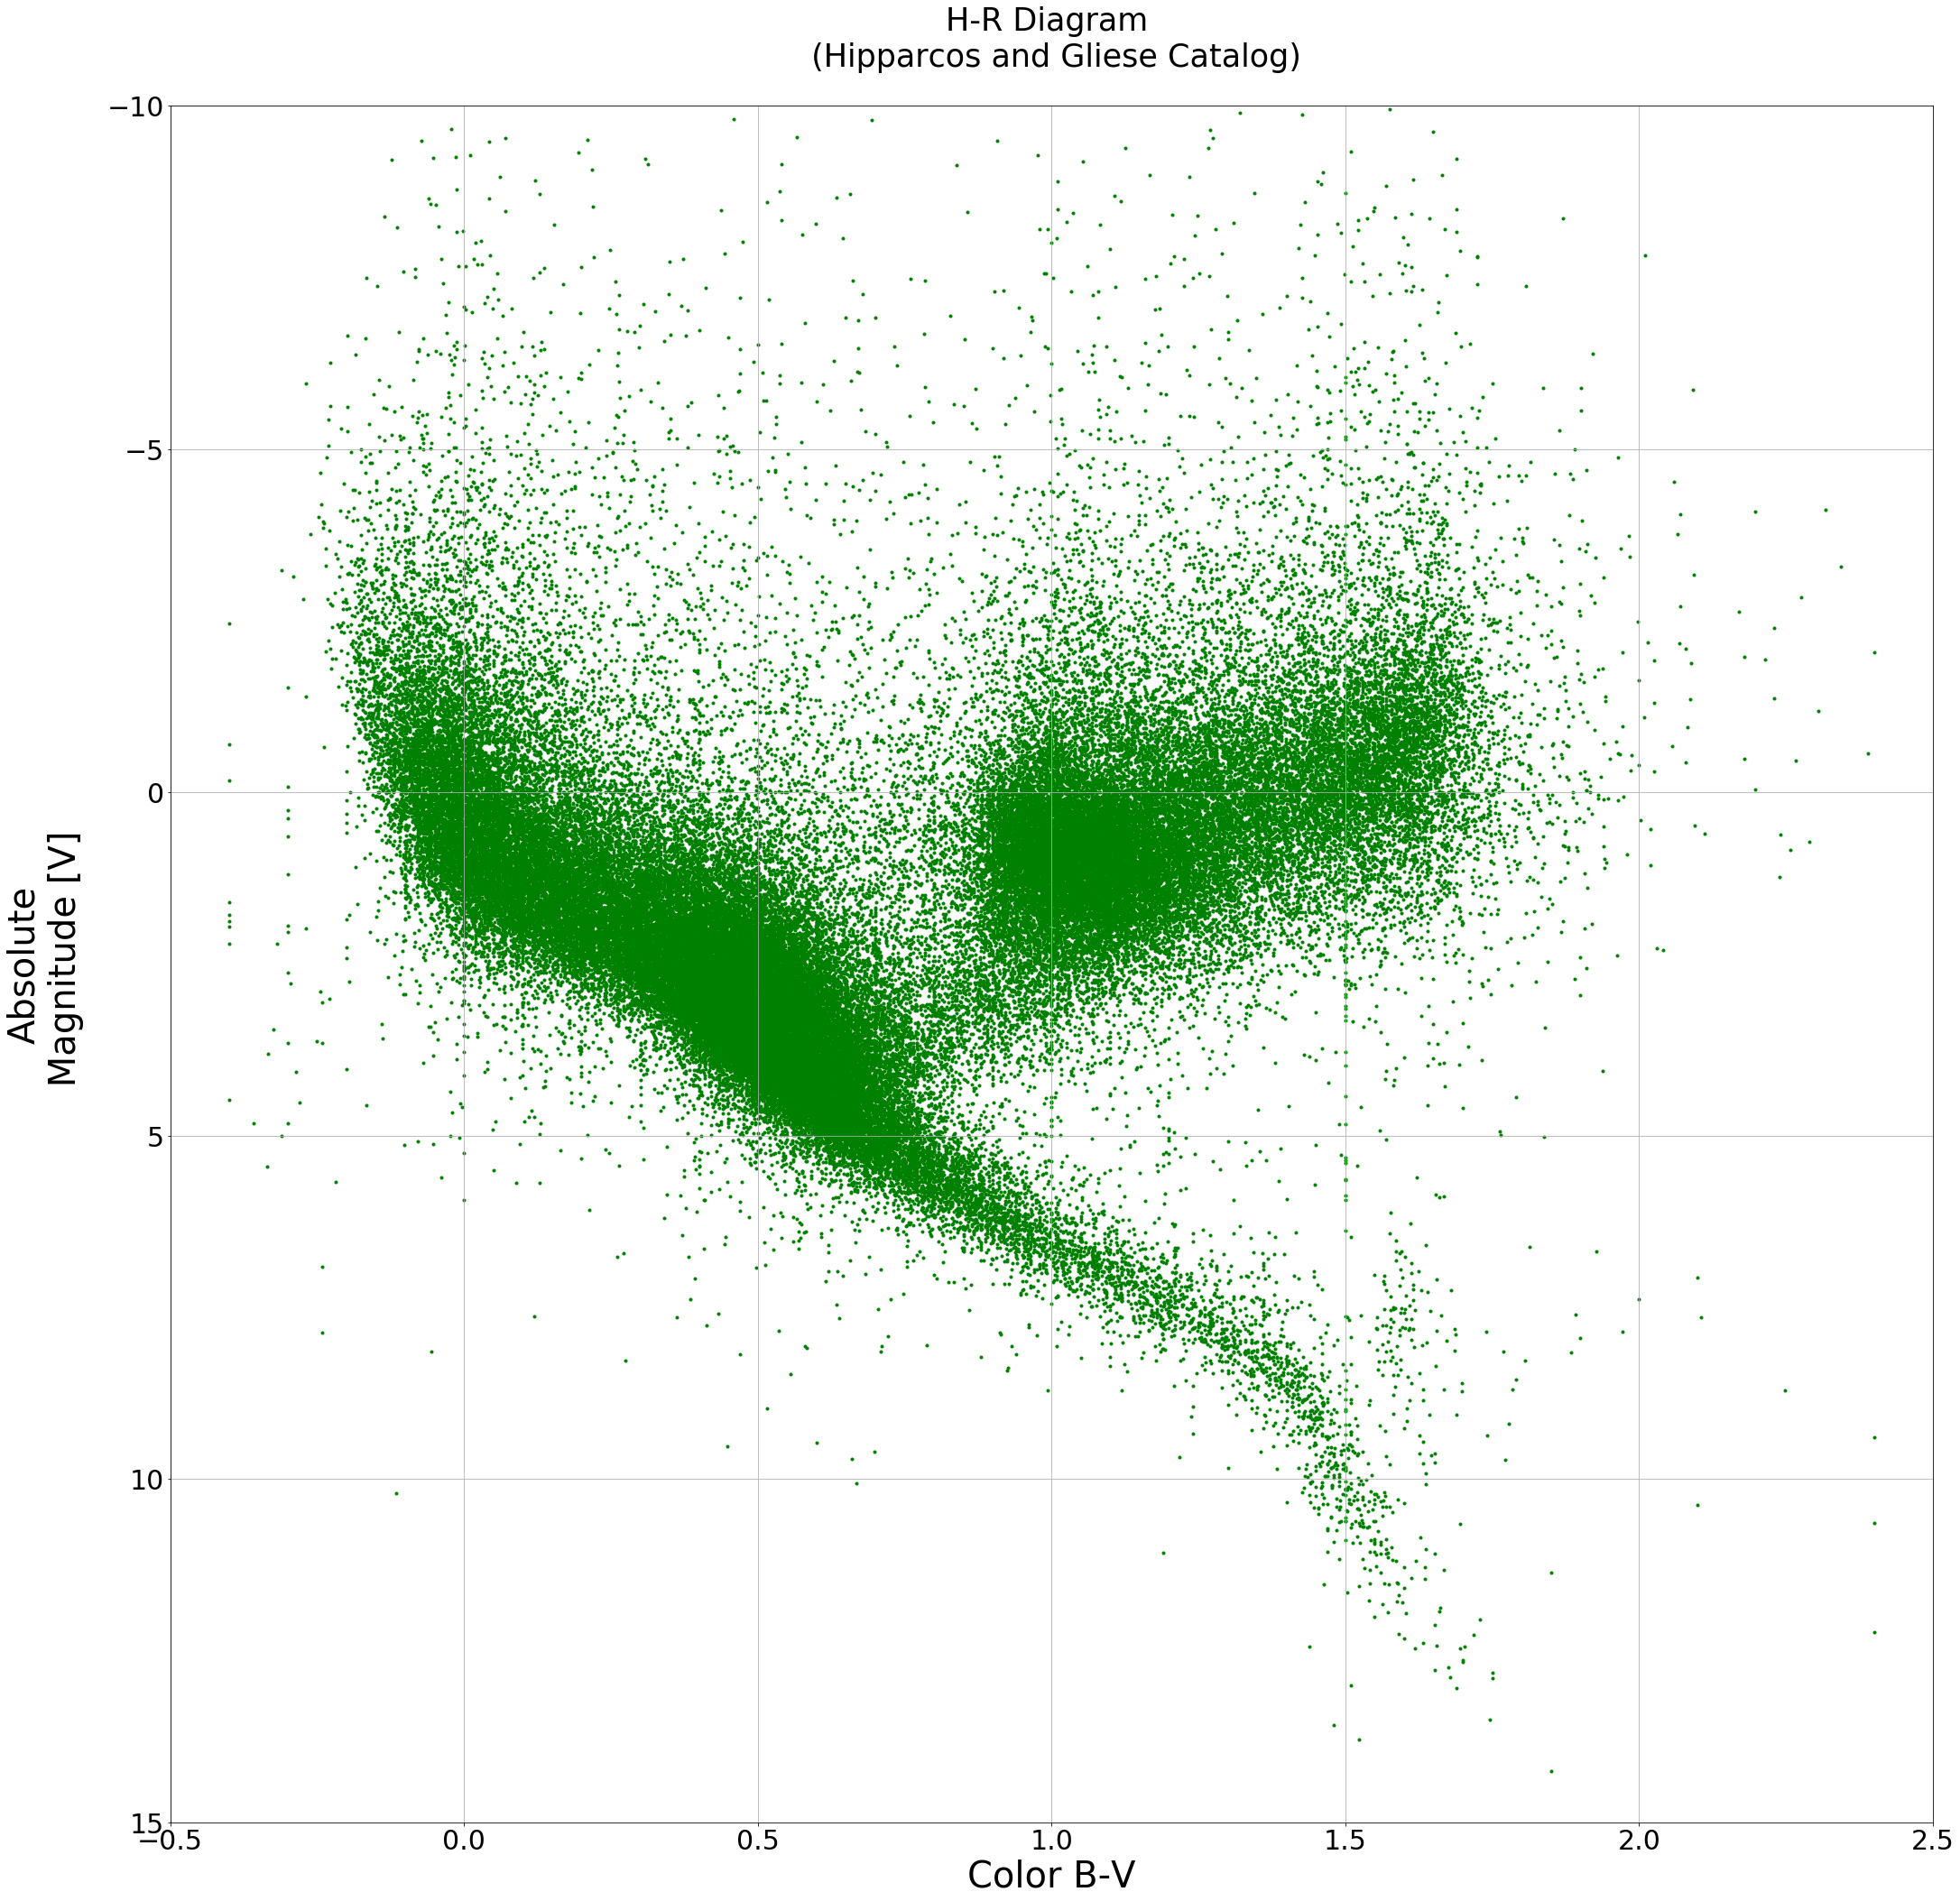

In [106]:
#'Basic H-R Diagram of all the feasible '
fig = figure(figsize = [35,35])
axR = plt.gca()

#'Right and Bottom axis'


grid()



axR.set_title('H-R Diagram \n (Hipparcos and Gliese Catalog)', y = 1.02)
axR.title.set_fontsize(35)
axR.tick_params(axis='both', labelsize = 30)

axR.set_xlabel('Color B-V')
axR.xaxis.label.set_fontsize(40)

scatter(data['B-V'],(data['M']),color = 'g', s=9)


r = axR.set_ylabel('Absolute\n Magnitude [V]')
#r.set_rotation(0)
axR.yaxis.label.set_fontsize(40)
axR.yaxis.set_ticks_position('left')
axR.yaxis.set_label_position('left')
axR.yaxis.labelpad = 25


#gca().invert_yaxis()
#'Left axis'

#axL = plt.gca(sharex = axR, frameon = False)
#L = axL
#h = L.set_ylabel('Visual \n Luminosity \n (Sun = 1)')
#h.set_rotation(0)

#L.yaxis.label.set_fontsize(25)
#L.tick_params(axis='both', labelsize = 25)
#L.yaxis.set_ticks_position('right')
#L.yaxis.set_label_position('right')
#ylabels = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]
#yticks = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
#yticks = ['0.00001','0.0001','0.001','0.01','0.1','1','10','100','1000','10000','100000']
#L.yaxis.set_ticks(yticks)
#L.yaxis.set_ticklabels(ylabels)
#L.yaxis.set_major_locator(MultipleLocator(10000))
#L.yaxis.labelpad = 35
#ylabel('Absolute Magnitude [V]')

#Top x - axis'

#axT = plt.gca(sharey = axL, frameon = False)

#axT.tick_params(axis='both', labelsize = 25)
#axT.xaxis.set_ticks_position('top')
#axT.set_xlabel('Temperature')
#axT.xaxis.label.set_fontsize(25)
#axT.xaxis.set_label_position('top')
#Tticks = [0.2,0.35,0.5,0.6,0.7,0.8,0.9]
#Tlabels = ['3000K','4000K','5000K','6000K','7500K','10000K','30000K']
#axT.xaxis.set_ticks(Tticks)
#axT.xaxis.set_ticklabels(Tlabels)
#axT.invert_xaxis()




#scatter(data['B-V'],data['M'],s = 9)
xlim(-0.5,2.5)
ylim(15,-10)
#axT.xaxis.set_major_locator(MaxNLocator(nbins = 8,steps=[5]))
#savefig('H-R Diagram.png')

97915

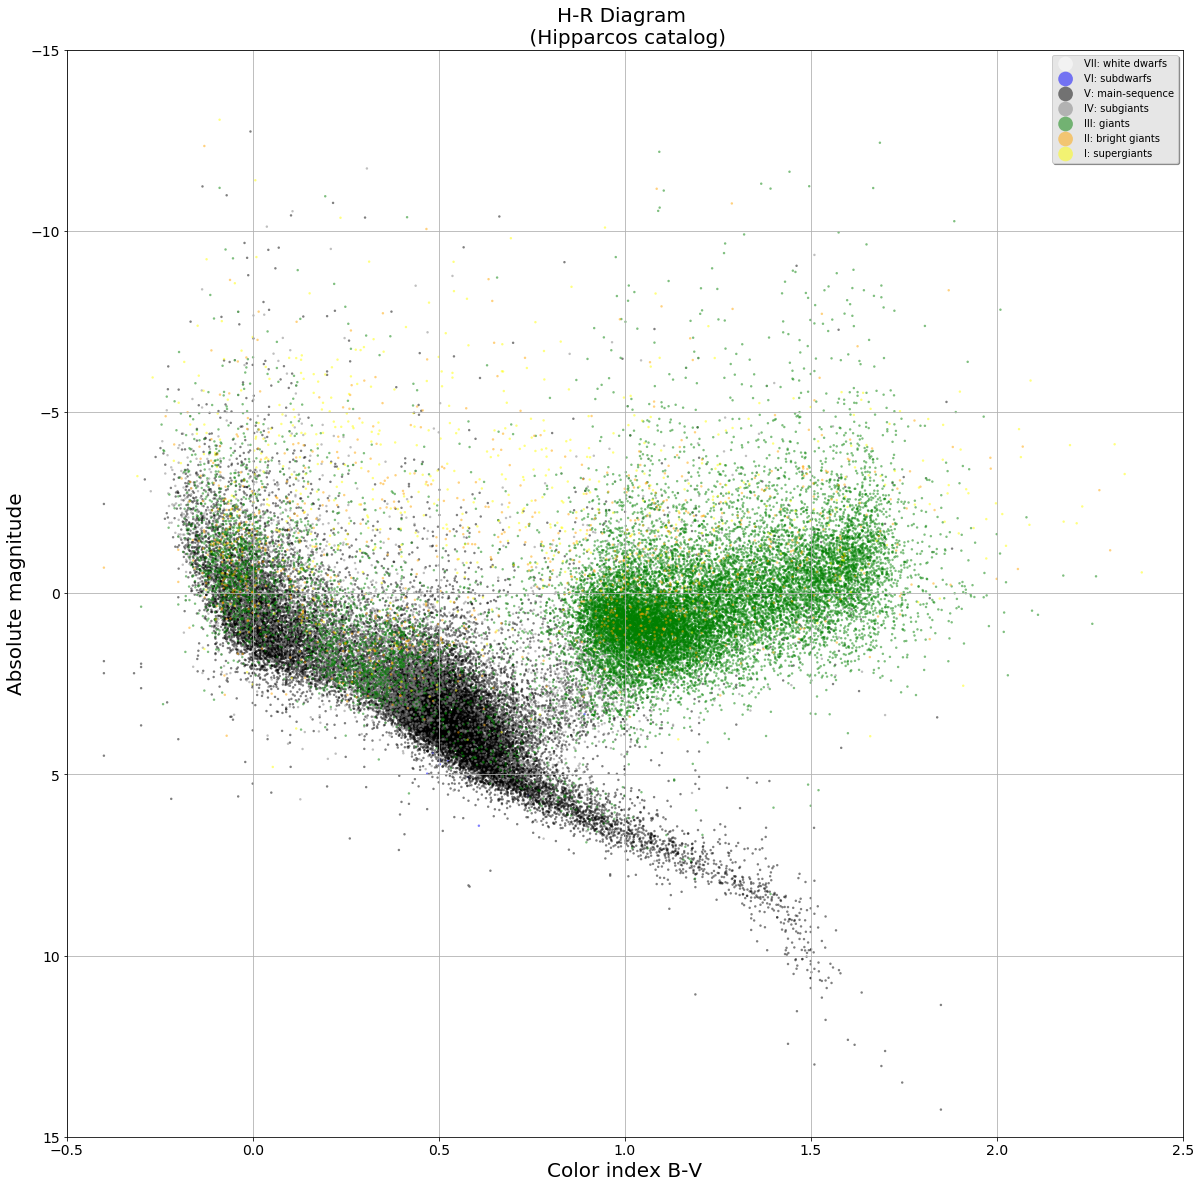

In [108]:

def plot_lum_class(b,c, label):
    ''' b: boolean Series to make the selection
        c: Color
        label: for the legend
    '''
    x = data['B-V'][b]
    y = data['M'][b]
    ax.scatter(x, y, c = c, s=6, edgecolors='none', label = label, alpha = 0.5)

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)

ax.set_xlim(-0.5, 2.5)
ax.set_ylim(15, -15)
ax.grid()
ax.set_title('H-R Diagram \n (Hipparcos catalog)')

ax.title.set_fontsize(20)
ax.set_xlabel('Color index B-V')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('Absolute magnitude')
ax.yaxis.label.set_fontsize(20)

f = lambda s: 'VII' in s
b = data['stype'].map(f)
plot_lum_class(b,'white', 'VII: white dwarfs')

f = lambda s: ('VI' in s) and ('VII' not in s)
b = data['stype'].map(f)
plot_lum_class(b,'blue', 'VI: subdwarfs')

f = lambda s: ('V' in s) and ('VI' not in s) and ('IV' not in s)
b = data['stype'].map(f)
plot_lum_class(b,'black', 'V: main-sequence')

f = lambda s: 'IV' in s
b = data['stype'].map(f)
plot_lum_class(b,'grey', 'IV: subgiants')

f = lambda s: 'III' in s
b = data['stype'].map(f)
plot_lum_class(b,'green', 'III: giants')

f = lambda s: ('II' in s) and ('III' not in s) and ('VII' not in s)
b = data['stype'].map(f)
plot_lum_class(b,'orange', 'II: bright giants')

f = lambda s: ('I' in s) and ('II' not in s) and ('V' not in s)
b = data['stype'].map(f)
plot_lum_class(b,'yellow', 'I: supergiants')

ax.tick_params(axis='both', labelsize=14)
legend = ax.legend(scatterpoints=1,markerscale = 6, shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
#savefig('H-R diagram complete.png')
len(data)